# Mini Project
## Network Biology
### Ghanendra Singh MT19213, Mtech CB
##### Paper Replication: A distance constrained synaptic plasticity model of C. elegans neuronal network, By Rahul Badhwar and Ganesh Bagler

In [1]:
#Libraries
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
import random

###### C. elegans Data

In [63]:
# C.elegans data from https://neurodata.io/project/connectomes/
GH = nx.read_graphml('c.elegans.herm.graphml')
adj = nx.adjacency_matrix(GH)
nh = GH.number_of_nodes()
eh = GH.number_of_edges()
print('No. of nodes: ',nh,'\nNo. of Edges: ',eh)

No. of nodes:  279 
No. of Edges:  3225


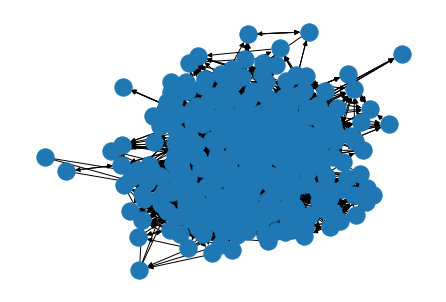

In [3]:
nx.draw_kamada_kawai(GH)

###### Supplementary Material Data

In [4]:
# Neurons and its positional coordinates Data extracted from supplimentary PDF file.
supp_data = pd.read_table('sup_data.txt',delim_whitespace=True, names = ('Neuron','X','Y'))
print(supp_data.head())

  Neuron         X         Y
0   ADAL  0.011068  0.005903
1   ADAR  0.014206  0.002204
2   ADEL  0.016233  0.005657
3   ADER  0.014941  0.009308
4   ADFL  0.082393 -0.000984


###### Calculating no. of Electrical and Chemical Synapses

In [5]:
# edges consists of chemical and electrical synapses.
# Making chemical synapses directed quickly
eC = 0
cC = 0
E_edges = []
C_edges = []
for edg in GH.edges(data=True):
    if (edg[2]['synapse_type']=='E'):
        E_edges.append([edg[0],edg[1]])
        eC+=1
    else:
        cC+=1
        C_edges.append([edg[0],edg[1]])
print('Electrical Synapses:',eC)
print('Chemical Synapses:',cC)

Electrical Synapses: 1031
Chemical Synapses: 2194


In [6]:
# Undirected Electrical Synapses Graph
Ge = nx.Graph()
Ge.add_edges_from(E_edges)

print("Ge Edges: ",Ge.number_of_edges())
print("Ge Nodes:", Ge.number_of_nodes())

Ge Edges:  517
Ge Nodes: 253


###### Undirected Electrical Synapses Graph

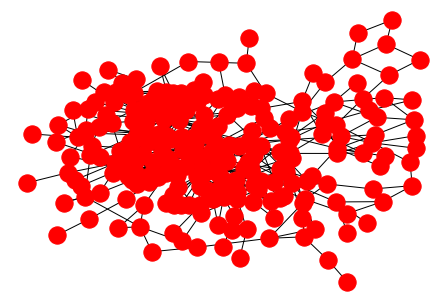

In [7]:
nx.draw_kamada_kawai(Ge,node_color='r')

In [8]:
#Directed Chemical Synapses Graph
Gc = nx.DiGraph()
Gc.add_edges_from(C_edges)
Gc.number_of_edges()
print("Gc Edges: ",Gc.number_of_edges())
print("Gc Nodes:", Gc.number_of_nodes())

Gc Edges:  2194
Gc Nodes: 279


##### Directed Chemical Synapses Graph

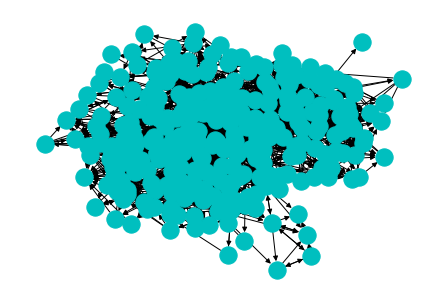

In [9]:
nx.draw_kamada_kawai(Gc,node_color='c')

In [10]:
# 3 Neurons missing in the Supplimentary data.
#AIBL
#AIYL
#SMDVL

# GH.remove_node('n12')
# GH.remove_node('n18')
# GH.remove_node('n224')

In [11]:
# Data from wormwiring neuronal connectivity
#rfile = pd.read_excel('NeuronConnect.xls')

# Results

### 2.1. C elegans neuronal network CeNN

In [12]:
# Number of somatic neurons
Neuron = 279
# Number of Synaptic Connections - (Electrical and Chemical Synapses)
Syn_conn = 3225

##### Average synaptic connection per neuron 11.55 synaptic connections

In [13]:
#Mean connectivity = lamda = E/N
# For entire network
GH.number_of_edges()/ GH.number_of_nodes()

11.559139784946236

In [14]:
# For chemical synapses roughly close to paper results 7.59 synaptic connections
# It consists of 277 neurons, so if we delete the other three neurons (AIBL, AIYL, SMDVL) we get 3130 total edges
# and 2125 chemical synapses

Gc.number_of_edges()/Gc.number_of_nodes()

7.863799283154122

In [15]:
# Again close to the results of paper ~ 7.69
2125/276

7.699275362318841

### 2.2. Topological properties of CeNN

##### 2.2.1 Clustering Coeffieient

In [16]:
nx.average_clustering(Gc)

0.21244232913418948

##### 2.2.2 Characteristic path-length

In [17]:
nx.average_shortest_path_length(Gc)

2.9506588277764885

In [18]:
#Random Controls(ER) of CeNN
# Zscore calculation
#Number of driver neurons (nD)
# Its computed using maximum matching criterion.
#https://dl.acm.org/doi/10.1145/98267.98287

### 2.3. Random controls of CeNN

###### Average Degree Distribution function

In [19]:
def avg_deg_dist(Deg_arr,glabel):
    len_deg_dist = []
    Deg_dist = list(Deg_arr)
    for i in Deg_arr:
        len_deg_dist.append(len(i))

    max_len_deg = max(len_deg_dist)
    for i in range(T):
        len_diff = max_len_deg - len(Deg_dist[i])
        while(len_diff>0):
            Deg_dist[i].append(0)
            len_diff = len_diff - 1
    # Average degree Distribution
    avg_deg_dist = np.mean(Deg_dist,axis=0)

    # Plot
    plt.scatter(range(1,max_len_deg+1),avg_deg_dist,color = 'k')
    plt.plot(range(1,max_len_deg+1),avg_deg_dist,label=glabel)
    plt.title("Average Degree Distribution ")
    plt.xlabel("k",fontsize = 15)
    plt.ylabel("P(k)",fontsize = 15)
    plt.legend(loc='best',fontsize = 15)
    plt.show()

def deg_ER(ER_G):
    deg_dist = ER_G.degree()
    deg = list(deg_dist)
    nd = []
    for i in deg:
        nd.append(i[1])
    c = Counter(nd)
    cd = dict(c)
    k3 = sorted(cd.keys())
    n3 = []
    for i in k3:
        n3.append(cd[i])
    return n3


###### ER Random control

In [20]:
# Erdös–Rényi random control (ER) and degree distribution conserved control (DD).
N = 279
E = 2194
random_edges = np.arange(N)
#ER Random Control
ER_G = nx.Graph()
avg_Cc = 0
avg_Lc = 0
T = 100

Deg_arr = []

# Degree Distribution
def deg_distf(deg):
    deg_dis = []
    deg_list = list(deg)
    for i in range(min(deg_list),max(deg_list)+1):
        deg_dis.append(deg_list.count(i))
    pk_deg = [i/sum(deg_dis) for i in deg_dis]
    return pk_deg


#100 instances
for i in range(T):
    
    ER_G = nx.Graph()
    adjM = np.zeros([N,N])
    while (ER_G.number_of_edges()<E):
        e1,e2 = np.random.choice(random_edges,2,replace=False)
        ER_G.add_edge(e1,e2)
    #print('ER random edges generated')
    #Calculate clustering coefficient
    avg_Cc += nx.average_clustering(ER_G)
    avg_Lc += nx.average_shortest_path_length(ER_G)
    Deg_arr.append(deg_ER(ER_G))
    
avg_CC = avg_Cc/T
avg_LC = avg_Lc/T

print('Avg Cc :',avg_CC)
print('Avg Lc :',avg_LC)
#Reset graph
#ER_G = nx.Graph()

Avg Cc : 0.056510367545760685
Avg Lc : 2.3315984631649522


##### ER Average Degree distribution after 100 instances

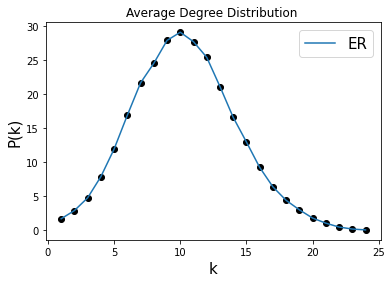

In [21]:
avg_deg_dist(Deg_arr,'ER')

###### ER Random Control Generated Graph

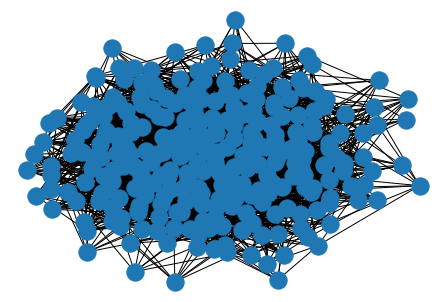

In [22]:
#ER graph
nx.draw(ER_G)

###### Degree Plotting Function

In [69]:
#Input parameter Graph
def deg_dist(DD_G,g_label='--',deg_type = 'deg'):
    if(deg_type=='deg'):
        deg_dist = DD_G.degree()
    elif(deg_type=='in'):
        deg_dist = DD_G.in_degree()
    elif(deg_type=='out'):
        deg_dist = DD_G.out_degree()
    deg = list(deg_dist)
    nd = []
    for i in deg:
        nd.append(i[1])
    #print(nd)
    c = Counter(nd)
    cd = dict(c)
    k3 = sorted(cd.keys())
    n3 = []
    for i in k3:
        n3.append(cd[i])
    #print(n3)
    plt.scatter(k3,n3,color = 'k')
    plt.plot(k3,n3,label=g_label)
    plt.title("Degree Distribution")
    plt.xlabel("Degree k",fontsize = 15)
    plt.ylabel("Nodes n",fontsize = 15)
    plt.legend(loc='best',fontsize = 15)
    #plt.yscale('log')
    #plt.xscale('log')
    # plt.xticks([1,10,100,1000])
    # plt.yticks([1, 10])
    plt.show()

###### Degree Distribution of ER random control

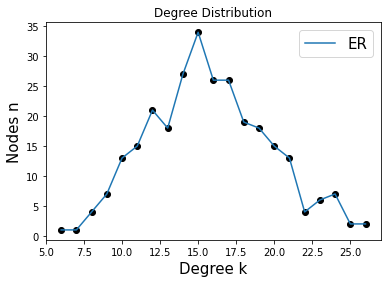

In [24]:
#Degree distribution for ER random control
deg_dist(ER_G,'ER','deg')

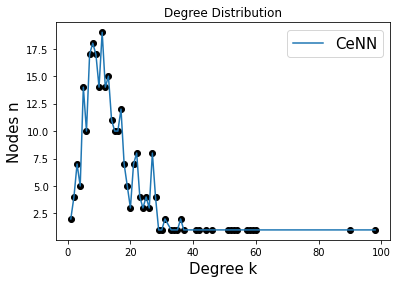

In [70]:
# Considering the chemical synapses in C. elegans
deg_dist(Gc,'CeNN','deg')

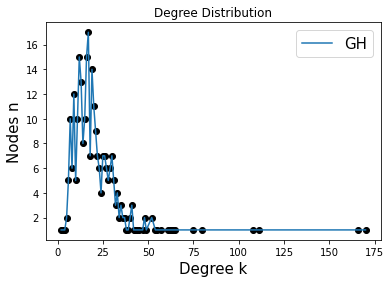

In [26]:
# For the C. elegans complete graph
deg_dist(GH,'GH','deg')

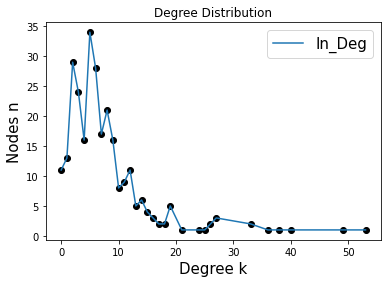

In [27]:
deg_dist(Gc,'In_Deg','in')

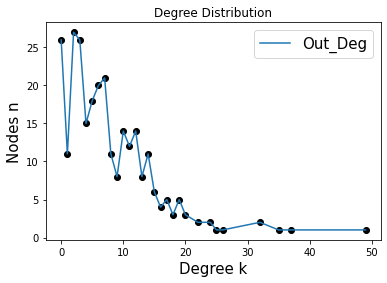

In [28]:
deg_dist(Gc,'Out_Deg','out')

###### DD Random control

In [29]:
## DD random Control
in_deg = Gc.in_degree()
out_deg = Gc.out_degree()

ne = Gc.number_of_edges()
nn = Gc.number_of_nodes()

#DD Random Control
avg_Cc = 0
avg_Lc = 0
DD_Deg_arr = []
T = 100
for i in range(T):
    DD_G = nx.DiGraph()
    random_edges = [ed for ed in range(nn)]
    while (DD_G.number_of_edges()<2000):
        e1,e2 = np.random.choice(random_edges,2,replace=False)
        if(DD_G.number_of_nodes()<nn):
            DD_G.add_nodes_from([e1,e2])
        if(DD_G.out_degree(e1)<out_deg('n'+str(e1)) and DD_G.in_degree(e2)<in_deg('n'+str(e2))):
            DD_G.add_edge(e1,e2)
        if(DD_G.out_degree(e2)<out_deg('n'+str(e2)) and DD_G.in_degree(e1)<in_deg('n'+str(e1))):
            DD_G.add_edge(e2,e1)
        # Removal of edges from random choice selection
        if(DD_G.out_degree(e1)==out_deg('n'+str(e1)) and DD_G.in_degree(e1)==in_deg('n'+str(e1))):
            random_edges.remove(e1)
        if(DD_G.out_degree(e2)==out_deg('n'+str(e2)) and DD_G.in_degree(e2)==in_deg('n'+str(e2))):
            random_edges.remove(e2)
    avg_Cc += nx.average_clustering(DD_G)
    avg_Lc += nx.average_shortest_path_length(DD_G)
    DD_Deg_arr.append(deg_ER(DD_G))
avg_CC = avg_Cc/T
avg_LC = avg_Lc/T
print('Avg_CC: ',avg_CC)
print('Avg_LC: ',avg_LC)

Avg_CC:  0.03892480699410725
Avg_LC:  2.7720766612516443


###### Avg Degree distribution after 100 instances of DD random control

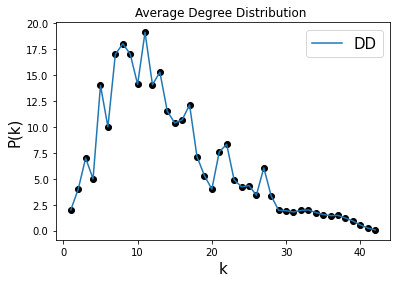

In [30]:
avg_deg_dist(DD_Deg_arr,'DD')

###### DD random control generated Graph

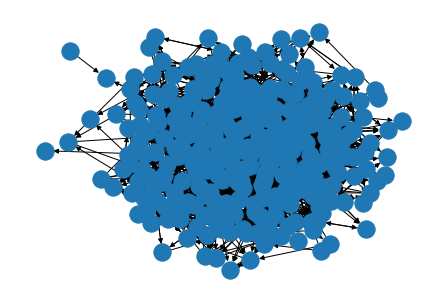

In [31]:
nx.draw_kamada_kawai(DD_G)

###### Degree Distribution of DD control for 1 instance

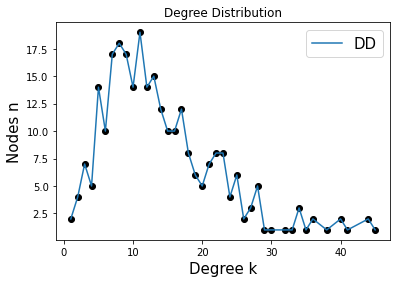

In [32]:
deg_dist(DD_G,'DD','deg')

### 2.4. 1D ring model of CeNN

P = 0


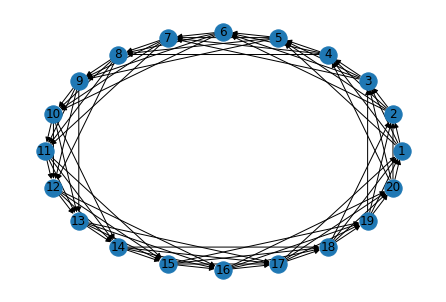

In [33]:
# Watts and Strogatz's model Demo model
WS = nx.DiGraph()
out_deg_count = 0
#WS.add_nodes_from(np.arange(1,11))
N=20 # Nodes
nbr = 1 # Neighbours
k = 4 # Avg out degree
print('P = 0')
while(nbr<=k):
    for i in range(1,N+1):
        j = i+nbr
        if(j>N):
            j=j-N
        WS.add_edge(i,j)
    nbr+=1
nx.draw_circular(WS,with_labels=True)

P = 0.5


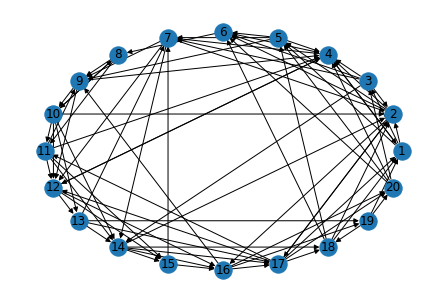

In [34]:
prob=0.5
print("P = %s"%prob)
iter = 0
WS_edges = WS.number_of_edges()
while(iter<WS_edges):
    rand = np.random.rand()
    if(rand>prob):
        re1,re2 = random.choice(list(WS.edges()))
        WS.remove_edge(re1,re2)
        #ae1,ae2 = np.random.choice(np.arange(1,N+1),2,replace=False)
        #WS.add_edge(ae1,ae2)
        while(1):
            ae1,ae2 = np.random.choice(np.arange(1,N+1),2,replace=False)
            if((ae1,ae2) not in WS.edges()):
                WS.add_edge(ae1,ae2)
                break
    iter+=1
nx.draw_circular(WS,with_labels=True)

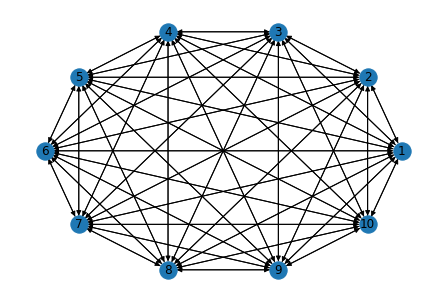

In [35]:
# Watts and Strogatz's model Demo model
WS = nx.DiGraph()
out_deg_count = 0
#WS.add_nodes_from(np.arange(1,11))
N=10 # Nodes
nbr = 1 # Neighbours
k = 9 # Avg out degree
while(nbr<=k):
    for i in range(1,N+1):
        j = i+nbr
        if(j>N):
            j=j-N
        WS.add_edge(i,j)
    nbr+=1
nx.draw_circular(WS,with_labels=True)

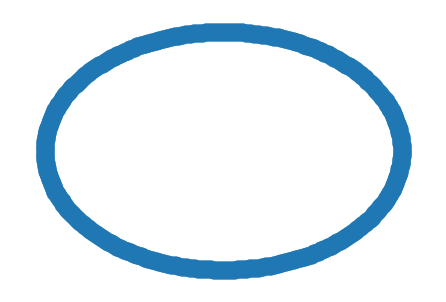

In [36]:
# Watts and Strogatz's model.
N = 279
WS = nx.DiGraph()
out_deg_count = 0
#WS.add_nodes_from(np.arange(1,11))
N=279 # Nodes
nbr = 1 # Neighbours
k = 8 # Avg out degree ~ (7.59)
while(nbr<=k):
    for i in range(1,N+1):
        j = i+nbr
        if(j>N):
            j=j-N
        WS.add_edge(i,j)
    nbr+=1
nx.draw_circular(WS)

In [75]:
print('Avg_Cc regular graph: ', nx.average_clustering(WS))
print('Avg Lc regular graph: ',nx.average_shortest_path_length(WS))

Avg_Cc regular graph:  0.3499999999999987
Avg Lc regular graph:  17.87769784172662


### 2.5. Distance constrained models of CeNN

In [37]:
#Data from the supplementary file about positions
supp_data = pd.read_table('sup_data.txt',delim_whitespace=True, names = ('Neuron','X','Y'))
print(supp_data.head())

  Neuron         X         Y
0   ADAL  0.011068  0.005903
1   ADAR  0.014206  0.002204
2   ADEL  0.016233  0.005657
3   ADER  0.014941  0.009308
4   ADFL  0.082393 -0.000984


###### 2D distance between neurons i and j ~ d(i, j) 

In [38]:
N = 277 # Nodes (no. of neurons)
#Matrix for storing 2D distance between neurons i and j
dij = np.zeros([N,N])

for i in range(N-1):
    XiYi = np.array([supp_data.X.iloc[i],supp_data.Y.iloc[i]])
    for j in range(i+1,N):
        XjYj = np.array([supp_data.X.iloc[j],supp_data.Y.iloc[j]])
        dij[i,j] = np.linalg.norm(XiYi-XjYj)
        dij[j,i] = dij[i,j]
print('Distances Calculated')

Distances Calculated


In [39]:
#Max distancevalue
np.max(dij)

1.162517462451182

In [40]:
#Min distance value
np.min(dij)

0.0

In [41]:
# Avg distance value
np.average(dij)

0.4158434710631482

###### 2.5.1 Distance constrained random (DCR) model

In [53]:
# Distance constraint random control Erdös–Rényi (DCR) 
N = 277
E = 2105

# Different values of alpha
alpha = np.arange(0.6,3.2,0.2)
#alpha = 0.2
avg_CC_arr = []
avg_LC_arr = []
DCR_deg_dist = []
random_edges = np.arange(N)
#ER Random Control
#T= 100 #No. of Instances
T=1
avg_Cc = 0.0
avg_Lc = 0.0
for alp in alpha:
    for i in range(T):
        DCR_G = nx.Graph()
        while (DCR_G.number_of_edges()<E):
            e1,e2 = np.random.choice(random_edges,2,replace=False)
            #p = np.power(1/dij[e1,e2],alpha[10])
            if(dij[e1,e2]<alp):
                DCR_G.add_edge(e1,e2)
            #Calculate clustering coefficient
        avg_Cc = nx.average_clustering(DCR_G)
        avg_Lc = nx.average_shortest_path_length(DCR_G)
        DCR_deg_dist.append(deg_ER(DCR_G))
    avg_CC_arr.append(avg_Cc)
    avg_LC_arr.append(avg_Lc)#/(T+len(alpha)))

In [51]:
print('Avg CC: ',np.mean(avg_CC_arr))
print('Avg LC: ',np.mean(avg_LC_arr))

Avg CC:  0.06091100926139
Avg LC:  2.3943557488919285


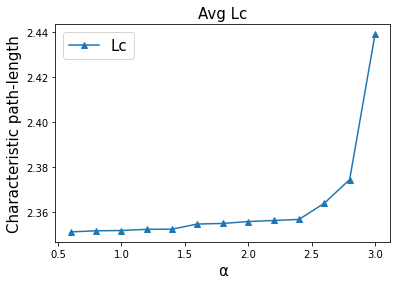

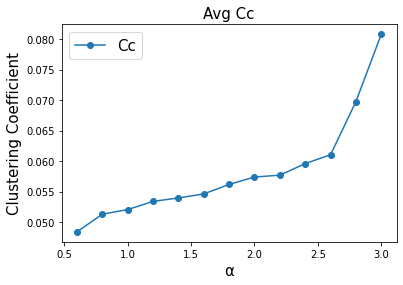

In [54]:
LC = avg_LC_arr
LC.sort()
CC = avg_CC_arr
CC.sort()
plt.plot(alpha,avg_LC_arr,label = 'Lc',marker='^')
plt.title('Avg Lc',fontsize = 15)
plt.xlabel('α',fontsize = 15)
plt.ylabel('Characteristic path-length',fontsize = 15)
plt.legend(loc='best',fontsize = 15)
plt.show()
plt.plot(alpha,avg_CC_arr,label = 'Cc',marker='o')
plt.title('Avg Cc',fontsize = 15)
plt.xlabel('α',fontsize = 15)
plt.ylabel('Clustering Coefficient',fontsize = 15)
plt.legend(loc='best',fontsize = 15)
plt.show()

In [59]:
# Distance constraint random control Erdös–Rényi (DCR) 
N = 277
E = 2105

# Different values of alpha
alpha = np.arange(0.6,3.2,0.2)
#alpha = 0.2
avg_CC_arr = []
avg_LC_arr = []
DCR_deg_dist = []
random_edges = np.arange(N)
#ER Random Control
#T= 100 #No. of Instances
T=100
alp = 0.6
avg_Cc = 0.0
avg_Lc = 0.0
for i in range(T):
    DCR_G = nx.Graph()
    while (DCR_G.number_of_edges()<E):
        e1,e2 = np.random.choice(random_edges,2,replace=False)
        #p = np.power(1/dij[e1,e2],alpha[10])
        if(dij[e1,e2]<alp):
            DCR_G.add_edge(e1,e2)
            #Calculate clustering coefficient
    avg_Cc = nx.average_clustering(DCR_G)
    avg_Lc = nx.average_shortest_path_length(DCR_G)
    DCR_deg_dist.append(deg_ER(DCR_G))
avg_CC_arr.append(avg_Cc)
avg_LC_arr.append(avg_Lc)#/(T+len(alpha)))

##### Degree distribution of DCR for just 1 iteration

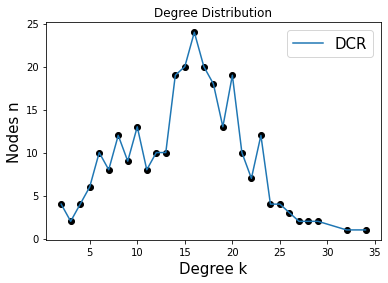

In [61]:
deg_dist(DCR_G,'DCR','deg')

###### Calculated avg Degree after 100 instances

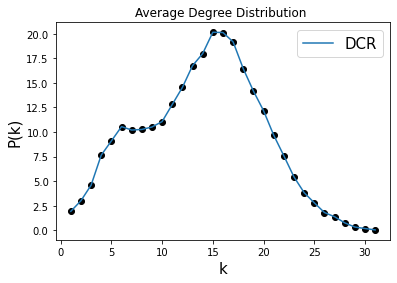

In [60]:
avg_deg_dist(DCR_deg_dist,'DCR')